# Spotify Top 50 Songs - Analysis
## UK and US Data
### (May 18, 2023 - Jan 12, 2024)

### Analysis of the top 50 songs(daily-210 days) in the UK and the US over the course of 8 months.

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Read in CSV Files

uk_data_path = Path("Resources/spotify-streaming-top-50-uk.csv")
us_data_path = Path("Resources/spotify-streaming-top-50-usa.csv")

uk_data = pd.read_csv(uk_data_path)
us_data = pd.read_csv(us_data_path)

In [3]:
uk_data.head()

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
0,2023-05-18,1,Tattoo,Loreen,89,183374,single,1,2023-02-25,False,https://i.scdn.co/image/ab67616d0000b2732b0ba8...
1,2023-05-18,2,Daylight,David Kushner,96,212953,single,1,2023-04-14,False,https://i.scdn.co/image/ab67616d0000b27395ca6a...
2,2023-05-18,3,Cha Cha Cha,Käärijä,86,175161,single,1,2023-01-17,False,https://i.scdn.co/image/ab67616d0000b273e9973a...
3,2023-05-18,4,Miracle (with Ellie Goulding),Calvin Harris & Ellie Goulding,91,186496,single,1,2023-03-10,False,https://i.scdn.co/image/ab67616d0000b273c58e22...
4,2023-05-18,5,Queen of Kings,Alessandra,85,147979,single,1,2023-01-09,False,https://i.scdn.co/image/ab67616d0000b2732c9eea...


In [4]:
us_data.head()

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
0,2023-05-18,1,Ella Baila Sola,Eslabon Armado,89,165671,album,16,2023-04-28,False,https://i.scdn.co/image/ab67616d0000b273dfddf1...
1,2023-05-18,2,Last Night,Morgan Wallen,89,163854,album,36,2023-03-03,True,https://i.scdn.co/image/ab67616d0000b273705079...
2,2023-05-18,3,All My Life (feat. J. Cole),Lil Durk & J. Cole,84,223878,single,1,2023-05-12,True,https://i.scdn.co/image/ab67616d0000b2737c173b...
3,2023-05-18,4,un x100to,Grupo Frontera & Bad Bunny,99,194563,single,1,2023-04-17,False,https://i.scdn.co/image/ab67616d0000b273716c0b...
4,2023-05-18,5,Kill Bill,SZA,94,153946,album,23,2022-12-08,False,https://i.scdn.co/image/ab67616d0000b2730c471c...


In [5]:
# Review both datasets

uk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             12000 non-null  object
 1   position         12000 non-null  int64 
 2   song             12000 non-null  object
 3   artist           12000 non-null  object
 4   popularity       12000 non-null  int64 
 5   duration_ms      12000 non-null  int64 
 6   album_type       12000 non-null  object
 7   total_tracks     12000 non-null  int64 
 8   release_date     12000 non-null  object
 9   is_explicit      12000 non-null  bool  
 10  album_cover_url  12000 non-null  object
dtypes: bool(1), int64(4), object(6)
memory usage: 949.3+ KB


In [6]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             12000 non-null  object
 1   position         12000 non-null  int64 
 2   song             12000 non-null  object
 3   artist           12000 non-null  object
 4   popularity       12000 non-null  int64 
 5   duration_ms      12000 non-null  int64 
 6   album_type       12000 non-null  object
 7   total_tracks     12000 non-null  int64 
 8   release_date     12000 non-null  object
 9   is_explicit      12000 non-null  bool  
 10  album_cover_url  12000 non-null  object
dtypes: bool(1), int64(4), object(6)
memory usage: 949.3+ KB


### Preprocessing

In [7]:
# Remove Non-beneficial columns

uk_data = uk_data.drop(columns=['popularity','album_type', 'total_tracks', 'album_cover_url'])
us_data = us_data.drop(columns=['popularity', 'album_type', 'total_tracks', 'album_cover_url'])

In [8]:
# Change 'date'/'release_date' column objects to datetime

uk_data[['release_date', 'date']] = uk_data[['release_date', 'date']].apply(pd.to_datetime, format='%Y-%m-%d')
us_data[['release_date', 'date']] = us_data[['release_date', 'date']].apply(pd.to_datetime, format='%Y-%m-%d')

In [9]:
# Add column with difference in days between 'release_date' and 'date'  

uk_data['days_since_released'] = (uk_data['date']- uk_data['release_date']).dt.days
us_data['days_since_released'] = (us_data['date']- us_data['release_date']).dt.days

In [10]:
# Change the 'duration_ms' column from displaying milliseconds to minutes

uk_data = uk_data.rename(columns={'duration_ms':'duration_minutes'})
us_data = us_data.rename(columns={'duration_ms':'duration_minutes'})

uk_data['duration_minutes'] = pd.to_datetime(uk_data['duration_minutes'], unit='ms').dt.strftime('%M:%S')
us_data['duration_minutes'] = pd.to_datetime(us_data['duration_minutes'], unit='ms').dt.strftime('%M:%S')

In [11]:
uk_data.head()

,date,position,song,artist,duration_minutes,release_date,is_explicit,days_since_released
0,2023-05-18,1,Tattoo,Loreen,03:03,2023-02-25,False,82
1,2023-05-18,2,Daylight,David Kushner,03:32,2023-04-14,False,34
2,2023-05-18,3,Cha Cha Cha,Käärijä,02:55,2023-01-17,False,121
3,2023-05-18,4,Miracle (with Ellie Goulding),Calvin Harris & Ellie Goulding,03:06,2023-03-10,False,69
4,2023-05-18,5,Queen of Kings,Alessandra,02:27,2023-01-09,False,129


In [12]:
us_data.head()

,date,position,song,artist,duration_minutes,release_date,is_explicit,days_since_released
0,2023-05-18,1,Ella Baila Sola,Eslabon Armado,02:45,2023-04-28,False,20
1,2023-05-18,2,Last Night,Morgan Wallen,02:43,2023-03-03,True,76
2,2023-05-18,3,All My Life (feat. J. Cole),Lil Durk & J. Cole,03:43,2023-05-12,True,6
3,2023-05-18,4,un x100to,Grupo Frontera & Bad Bunny,03:14,2023-04-17,False,31
4,2023-05-18,5,Kill Bill,SZA,02:33,2022-12-08,False,161


### Preliminary Analysis

In [13]:
# Songs with the most (daily) number 1's over the past 8 months (UK)

num1_songs_uk = uk_data[uk_data['position']== 1][['artist', 'song']].value_counts()
num1_songs_uk

artist                          song                                               
Dave & Central Cee              Sprinter                                               86
Doja Cat                        Paint The Town Red                                     34
Kenya Grace                     Strangers                                              32
Wham!                           Last Christmas - Single Version                        27
Jack Harlow                     Lovin On Me                                            20
Noah Kahan                      Stick Season                                           16
David Kushner                   Daylight                                               10
Calvin Harris & Ellie Goulding  Miracle (with Ellie Goulding)                           6
Taylor Swift                    Is It Over Now? (Taylor's Version) (From The Vault)     5
The Beatles                     Now And Then                                            2
Drake           

In [14]:
# Songs with the most (daily) number 1's over the past 8 months (US)

num1_songs_us = us_data[us_data['position']== 1][['artist', 'song']].value_counts()
num1_songs_us

artist                          song                                               
Brenda Lee                      Rockin' Around The Christmas Tree                      30
Doja Cat                        Paint The Town Red                                     30
Jack Harlow                     Lovin On Me                                            26
Eslabon Armado                  Ella Baila Sola                                        26
Morgan Wallen                   Last Night                                             20
Taylor Swift                    Is It Over Now? (Taylor's Version) (From The Vault)    18
Drake                           IDGAF (feat. Yeat)                                     17
Gunna                           fukumean                                               14
Olivia Rodrigo                  vampire                                                12
Zach Bryan                      I Remember Everything (feat. Kacey Musgraves)           8
Olivia Rodrigo  

In [15]:
# Top 10 artists with the most amount of top 50 songs (UK)

artists_uk = uk_data['artist'].value_counts()
top_10_artists_uk = artists_uk.head(10)
top_10_artists_uk

Taylor Swift          1001
Olivia Rodrigo         508
Arctic Monkeys         406
Dave & Central Cee     326
Drake                  276
Harry Styles           252
Dua Lipa               249
The Killers            214
Doja Cat               208
David Kushner          208
Name: artist, dtype: int64

In [16]:
# Top 10 artists with the most amount of top 50 songs (US)

artists_us = us_data['artist'].value_counts()
top_10_artists_us = artists_us.head(10)
top_10_artists_us

Taylor Swift      1097
Morgan Wallen      756
Zach Bryan         669
Drake              618
Travis Scott       525
Olivia Rodrigo     456
SZA                417
Bad Bunny          288
Doja Cat           286
Peso Pluma         266
Name: artist, dtype: int64

In [17]:
# Create copies of the two datsets, but only containing unique songs for further analysis

unique_uk = uk_data.drop_duplicates(subset=['artist', 'song'])

unique_us = us_data.drop_duplicates(subset=['artist', 'song'])

In [18]:
# Calculate the percentage of songs that are explicit (UK)

explicit_uk = unique_uk[unique_uk['is_explicit']==True]
explicit_uk = (len(explicit_uk)/len(unique_uk))*100 
explicit_uk = round(explicit_uk, 2)
print(f"The percentage of top songs in the UK over the past 8 months that are explicit is {explicit_uk}")

The percentage of top songs in the UK over the past 8 months that are explicit is 37.41


In [19]:
# Calculate the percentage of songs that are explicit (US)

explicit_us = unique_us[unique_us['is_explicit']==True]
explicit_us = (len(explicit_us)/len(unique_us))*100 
explicit_us = round(explicit_us, 2)
print(f"The percentage of top songs in the US over the past 8 months that are explicit is {explicit_us}")

The percentage of top songs in the US over the past 8 months that are explicit is 49.32


In [20]:
# Combine both datasets for further trend analysis in songs, artists, etc.

uk_data['country'] = 'UK'
us_data['country'] = 'USA'

combined_data = pd.concat([uk_data, us_data], ignore_index=True)

### Trends

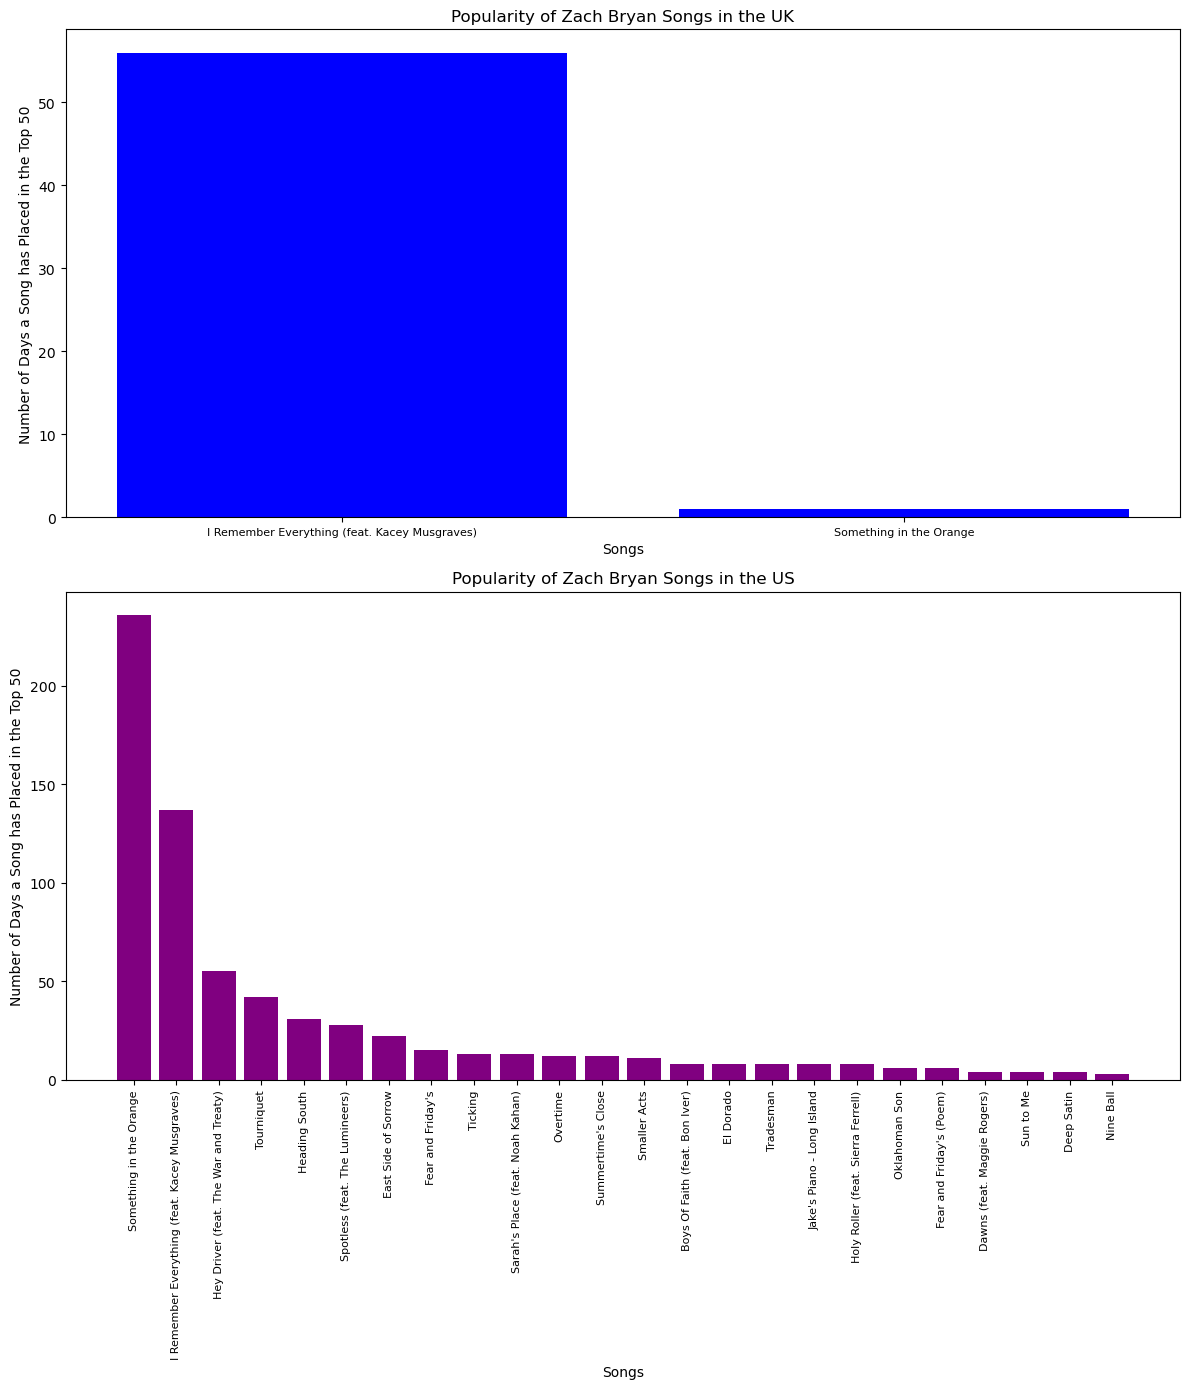

In [21]:
# The Popularity of 'Zach Bryan' songs (UK vs. US)

# Retrieve all rows that mention 'Zach Bryan' as the artist
zb_uk = uk_data[uk_data['artist'].str.contains('Zach Bryan')]
zb_us = us_data[us_data['artist'].str.contains('Zach Bryan')]

# Get the sum of each unique song 
zb_uk_songs = zb_uk['song'].value_counts()
zb_us_songs = zb_us['song'].value_counts()


# Create separate charts for UK and US
fig, axs = plt.subplots(2, 1, figsize=(12, 14))

# Bar chart for UK
axs[0].bar(zb_uk_songs.index, zb_uk_songs.values, color='blue')
axs[0].set_title('Popularity of Zach Bryan Songs in the UK')
axs[0].set_ylabel('Number of Days a Song has Placed in the Top 50')
axs[0].set_xlabel('Songs')
axs[0].tick_params(axis='x', labelsize=8)


# Bar chart for US
axs[1].bar(zb_us_songs.index, zb_us_songs.values, color='purple')
axs[1].set_title('Popularity of Zach Bryan Songs in the US')
axs[1].set_ylabel('Number of Days a Song has Placed in the Top 50')
axs[1].set_xlabel('Songs')
axs[1].tick_params(axis='x', labelsize=8, labelrotation=90)

plt.tight_layout()
plt.show()

### Analysis:
### In this visualization, we can draw insights from the popularity of Zach Bryan's music in the United States compared to the United Kingdom. The visualization indicates a notable discrepancy in the streaming of Zach Bryan's music between the two countries, with a higher level of popularity observed in the United States compared to the United Kingdom. This is evident not only by more songs of his charting on the top 50 in the United States, but by the total amount of days that Zach Bryan's songs have placed on the top 50.
### In addition, due to the reception of the artist's music in the United Kingdom being substantially lower than in the United States, it is possible to suggest that deeper underlying factors could be at play. One potential factor could be the prevelance of country music in American music streaming compared to that of the United Kingdom. In order to further analyze the influence this has on Zach Bryan's popularity between the two countries, an analysis of genre preference between the US and UK would be beneficial.
### In conclusion, the visualization suggests lower popularity in streaming of a prominent artist in a region abroad, such as the United Kingdom. This information can prove valuable for collecting data to inform decision-making in marketing campaigns and creating growth in music streams outside the United States.  

In [22]:
# Filter 'combined_data' to separate 'release_date' by season

# Filter for each season
spring = (combined_data['release_date'].dt.month >= 3) & (combined_data['release_date'].dt.month <= 5)
summer = (combined_data['release_date'].dt.month >= 6) & (combined_data['release_date'].dt.month <= 8)
fall = (combined_data['release_date'].dt.month >= 9) & (combined_data['release_date'].dt.month <= 11)
winter = (combined_data['release_date'].dt.month == 12) | (combined_data['release_date'].dt.month <= 2)

# Create dataframe for each season
spring_data = combined_data[spring]
summer_data = combined_data[summer]
fall_data = combined_data[fall]
winter_data = combined_data[winter]

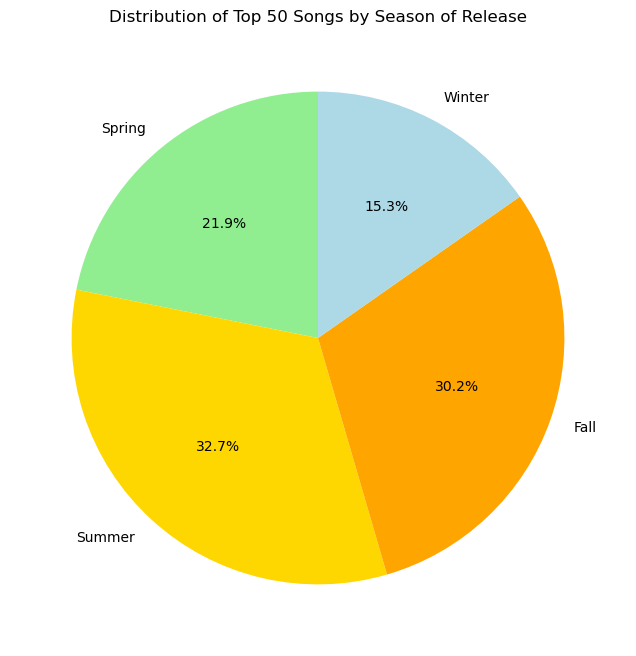

In [23]:
# Distribution of Top 50 Songs by Season of Release

# Count number of values in each df to find distribution by season
season_counts = [len(spring_data), len(summer_data), len(fall_data), len(winter_data)]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=['Spring', 'Summer', 'Fall', 'Winter'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'gold', 'orange', 'lightblue'])
plt.title('Distribution of Top 50 Songs by Season of Release')
plt.show()

### Analysis:
### The majority of the top 50 songs were released during the summer, which is demonstrated by the 32.7% of all songs in the past 8 months. This suggests a notable trend where a substantial number of popular songs are launched during this season, or potentially, music is more widely streamed during this time.
### Following closely behind, fall contributes a substantial 30.2% to the distribution. Fall releases also hold prevelance in the top 50 songs streamed and can suggest a productive time for popular music release. 
### Next, spring holds 21.9%, representing a noteworthy but slightly smaller proportion. The moderate percentage suggests that spring remains a competitive season for music releases, although with a somewhat lower frequency compared to summer and fall.
### Winter, with a share of 15.3%, marks the season with the least number of top 50 song releases. This could be attributed to various factors, although, it is possible that this time of year marks a low in overrall music streaming. More in-depth analysis would be needed to come to a more decisive conclusion.
### In summary, this visualization provides insights into the seasonal distribution of the top 50 songs streamed on Spotify(US/UK), indicating a dynamic landscape where summer and fall dominate in terms of the number of popular releases, while spring and winter contribute with slightly lower percentages.

In [24]:
# UK and US Data for the Taylor Swift song 'Cruel Summer'

cruel_summer_uk = uk_data[uk_data['song']== 'Cruel Summer']
cruel_summer_us = us_data[us_data['song']== 'Cruel Summer']

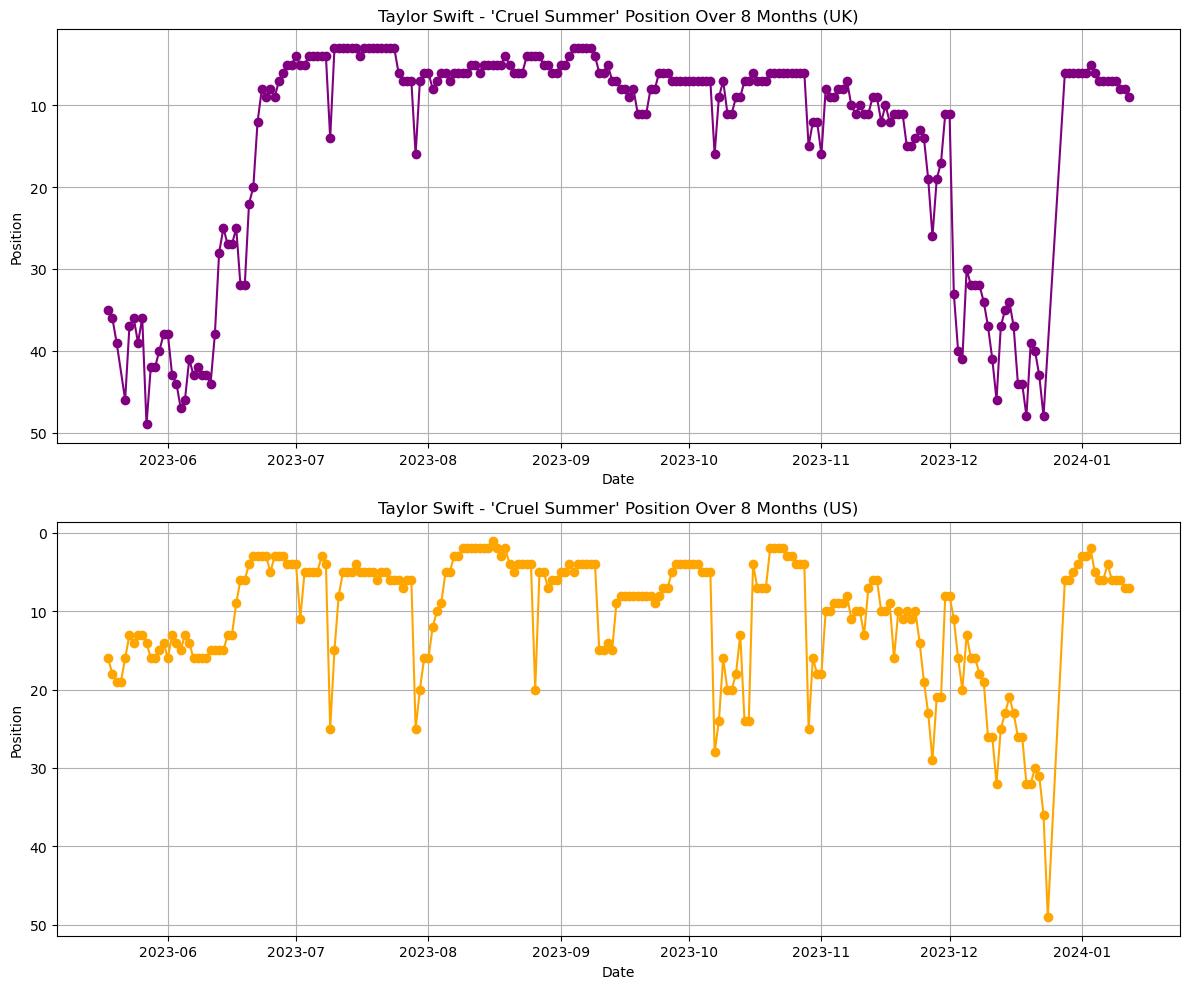

In [25]:
# Plotting subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# UK Line Chart
ax1.plot(cruel_summer_uk['date'], cruel_summer_uk['position'], marker='o', linestyle='-', color='purple')
ax1.set_title("Taylor Swift - 'Cruel Summer' Position Over 8 Months (UK)")
ax1.set_xlabel('Date')
ax1.set_ylabel('Position')
ax1.invert_yaxis()
ax1.grid(True)

# US Line Chart
ax2.plot(cruel_summer_us['date'], cruel_summer_us['position'], marker='o', linestyle='-', color='orange')
ax2.set_title("Taylor Swift - 'Cruel Summer' Position Over 8 Months (US)")
ax2.set_xlabel('Date')
ax2.set_ylabel('Position')
ax2.invert_yaxis()
ax2.grid(True)

plt.tight_layout()
plt.show()

### Analysis:
### Examining the comparison of Taylor Swift's song 'Cruel Summer' on the top 50 songs streamed in the United Kingdom and the United States reveals valuable insights. The line chart distinctly indicates that the song achieved a position in the top 20 on Spotify in the US approximately a month earlier than in the UK. Potential factors contributing to this discrepancy could include differences in tour schedules or a more widespread reception in the United States.
### Additionally, it is noteworthy that the song maintained slightly lower positions in the United Kingdom until December, contrasting with its performance in the United States streams. This variation could be influenced by diverse factors affecting the song's popularity in each region.
### The charts also highlight a significant decrease in the song's positioning during the final month of the year in both the United Kingdom and the United States. This decline may be attributed to holiday-related factors or unforeseen circumstances impacting the streaming patterns of the song.
### In conclusion, these insights provide a deeper understanding of the nuances in the streaming dynamics of a popular song by a well-known artist within two distinct markets, shedding light on factors such as timing, reception, and seasonal influences.